In [2]:
from goes2go.data import goes_timerange
import goes2go
from goes2go import GOES
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

In [2]:
OUTDIR = '/glade/work/jpan/PIML_GOES'
start = '2021-01-01 00:00'
end = '2021-01-01 23:59'

In [6]:
%%capture
gtr = goes_timerange(start, end, satellite='goes16', product='ABI-L2-CMIPC', domain='C', save_dir=OUTDIR)

In [34]:
gtr.attrs

{'satellite': 'noaa-goes16',
 'product': 'ABI-L2-CMIPC',
 'start': Timestamp('2021-01-01 00:00:00'),
 'end': Timestamp('2021-01-01 23:59:00'),
 'bands': None,
 'refresh': False,
 'filePath': '/glade/work/jpan/PIML_GOES'}

In [8]:
gtr.start

0      2021-01-01 00:01:17.600
1      2021-01-01 00:06:17.600
2      2021-01-01 00:11:17.600
3      2021-01-01 00:16:17.600
4      2021-01-01 00:21:17.600
                 ...          
4603   2021-01-01 23:36:17.600
4604   2021-01-01 23:41:17.600
4605   2021-01-01 23:46:17.600
4606   2021-01-01 23:51:17.600
4607   2021-01-01 23:56:17.600
Name: start, Length: 4608, dtype: datetime64[ns]

In [3]:
Gsat = GOES(satellite=16, product='ABI-L2-MCMIP', domain='C')
ds = Gsat.nearesttime('2021-01-01 00:01:17.600')

 👮🏻‍♂️ File already exists. Do not overwrite: /glade/u/home/jpan/data/noaa-goes16/ABI-L2-MCMIPC/2021/001/00/OR_ABI-L2-MCMIPC-M6_G16_s20210010001176_e20210010003555_c20210010004098.nc
📦 Finished downloading [1] files to [/glade/u/home/jpan/data/noaa-goes16/ABI-L2-MCMIPC].
📚 Finished reading [1] files into xarray.Dataset.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [31]:
type(Gsat), type(gtr)
Gsat

╭───────────────────────────────╌┄┈
│ 🌎 GOES Object   
│ ───────────────
│  self.satellite='noaa-goes16'
│  self.product='ABI-L2-MCMIPC'
│  self.domain='C'
│  self.bands=None
│  self.description='Advanced Baseline Imager Level 2 Cloud and Moisture Imagery CONUS'
╰───────────────────────────────╌┄┈

In [26]:
ds.goes_imager_projection

<xarray.DataArray 'goes_imager_projection' ()>
array(-2147483647, dtype=int32)
Coordinates:
    t                    datetime64[ns] 2021-01-01T00:02:36.616341888
    y_image              float32 0.08624
    x_image              float32 -0.03136
    dataset_name         <U74 'OR_ABI-L2-MCMIPC-M6_G16_s20210010001176_e20210...
    date_created         <U22 '2021-01-01T00:04:09.8Z'
    time_coverage_start  <U22 '2021-01-01T00:01:17.6Z'
    time_coverage_end    <U22 '2021-01-01T00:03:55.5Z'
Attributes:
    long_name:                       GOES-R ABI fixed grid projection
    grid_mapping_name:               geostationary
    perspective_point_height:        35786023.0
    semi_major_axis:                 6378137.0
    semi_minor_axis:                 6356752.31414
    inverse_flattening:              298.2572221
    latitude_of_projection_origin:   0.0
    longitude_of_projection_origin:  -75.0
    sweep_angle_axis:                x

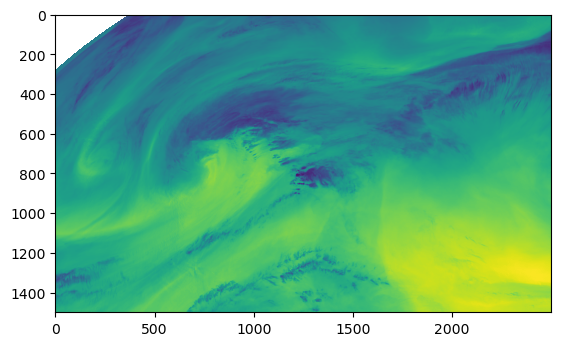

In [32]:
plt.imshow(ds.CMI_C08.values)

/glade/u/home/jpan/miniconda3/envs/IST597/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


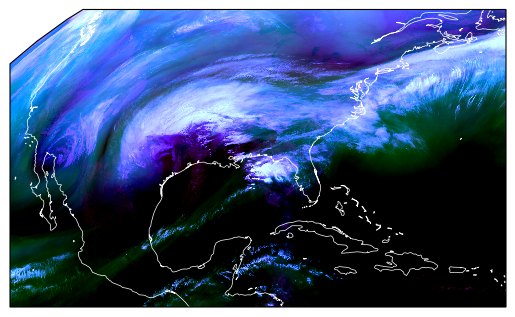

In [66]:
ax=plt.subplot(projection=ds.rgb.crs)
ax.imshow(ds.rgb.WaterVapor(), **ds.rgb.imshow_kwargs)
ax.coastlines(color='white', linewidth=0.5)

In [88]:
lat, lon = ds.rgb.get_latlon()
wv = ds.rgb.WaterVapor()
wh = np.where((lat > 25) & (lat < 45))

In [109]:
mask = (wv.latitude > 35) & (wv.latitude < 45)
slc = ds.where(mask, drop=True)

In [107]:
ax=plt.subplot(projection=slc.crs)
ax.imshow(slc, **slc.imshow_kwargs)
ax.coastlines(color='white', linewidth=0.5)

AttributeError: 'Dataset' object has no attribute 'crs'

In [113]:
ds.rgb.crs

<Projected CRS: +proj=geos +a=6378137.0 +b=6356752.31414 +rf=298.2 ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Geostationary Satellite (Sweep X)
Datum: Unknown based on GRS 1980 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [124]:
ds.latitude.dropna(dim='y')
np.where(np.isnan(ds.latitude))[0].shape

(47162,)

In [122]:
np.where(np.isnan(ds.longitude))[0].shape

(47162,)

In [128]:
lattrim = ds.latitude.where(~np.isnan(ds.latitude))

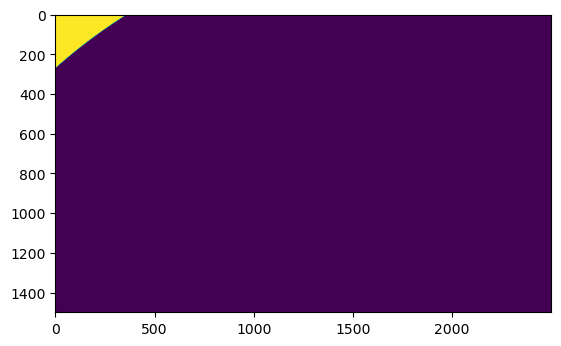

In [135]:
plt.imshow(np.isnan(ds.longitude))

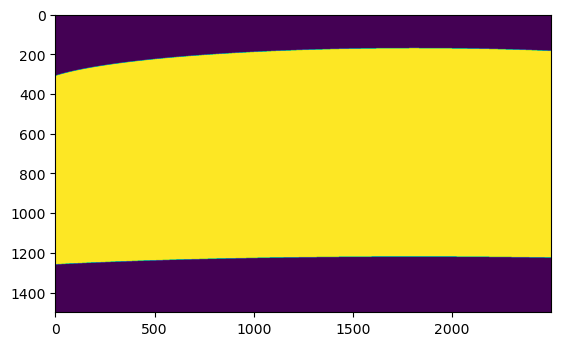

In [134]:
latmask = (ds.latitude > 20) & (ds.latitude < 45)
plt.imshow(latmask)

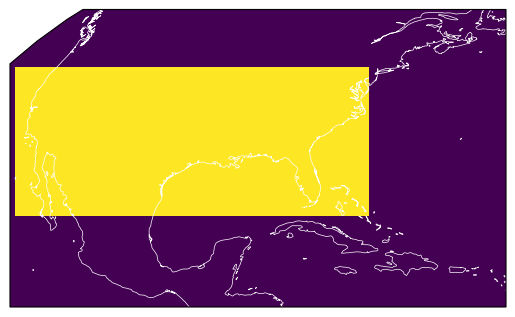

In [170]:
mask = (ds.x > -0.1) & (ds.x < 0) & (ds.y > 0.07) & (ds.y < 0.112)
ax=plt.subplot(projection=ds.rgb.crs)
ax.imshow(mask.T, **ds.rgb.imshow_kwargs)
ax.coastlines(color='white', linewidth=0.5)

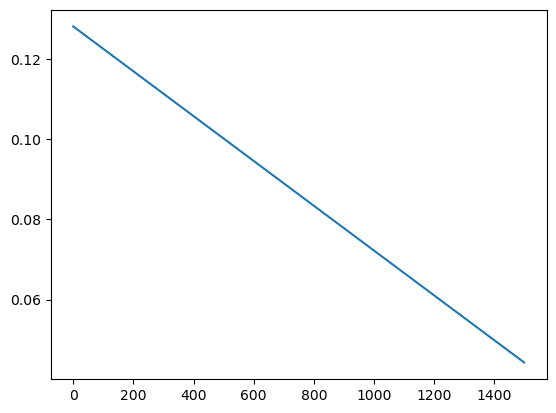

In [151]:
plt.plot(range(ds.y.shape[0]), ds.y)

In [158]:
mask

<xarray.DataArray (x: 2500, y: 1500)>
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])
Coordinates:
    t                    datetime64[ns] 2021-01-01T00:02:36.616341888
  * x                    (x) float64 -0.1013 -0.1013 -0.1012 ... 0.03856 0.03861
    y_image              float32 0.08624
    x_image              float32 -0.03136
    dataset_name         <U74 'OR_ABI-L2-MCMIPC-M6_G16_s20210010001176_e20210...
    date_created         <U22 '2021-01-01T00:04:09.8Z'
    time_coverage_start  <U22 '2021-01-01T00:01:17.6Z'
    time_coverage_end    <U22 '2021-01-01T00:03:55.5Z'
  * y                    (y) float64 0.1282 0.1282 0.1281 ... 0.04432 0.04427

In [171]:
myslc = wv.where(mask, drop=True)

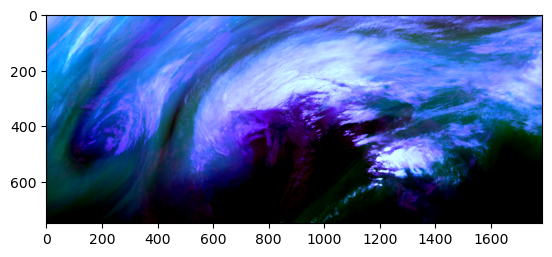

In [177]:
plt.imshow(myslc)

In [178]:
myslc.rgb

<xarray.DataArray 'rgb' (rgb: 3)>
array(['R', 'G', 'B'], dtype='<U1')
Coordinates:
    t                    datetime64[ns] 2021-01-01T00:02:36.616341888
    y_image              float32 0.08624
    x_image              float32 -0.03136
    dataset_name         <U74 'OR_ABI-L2-MCMIPC-M6_G16_s20210010001176_e20210...
    date_created         <U22 '2021-01-01T00:04:09.8Z'
    time_coverage_start  <U22 '2021-01-01T00:01:17.6Z'
    time_coverage_end    <U22 '2021-01-01T00:03:55.5Z'
  * rgb                  (rgb) <U1 'R' 'G' 'B'

In [180]:
myslc

<xarray.DataArray 'WaterVapor' (y: 750, x: 1786, rgb: 3)>
array([[[0.1731605 , 0.648939  , 1.        ],
        [0.33186346, 0.688157  , 1.        ],
        [0.56430733, 0.7198328 , 1.        ],
        ...,
        [0.19880968, 0.25223392, 0.48715687],
        [0.20762658, 0.25826716, 0.49342918],
        [0.21323735, 0.26580942, 0.50910807]],

       [[0.3326651 , 0.688157  , 1.        ],
        [0.5747272 , 0.72737503, 1.        ],
        [0.5779334 , 0.7243581 , 1.        ],
        ...,
        [0.23087084, 0.327653  , 0.66589284],
        [0.22445846, 0.30351895, 0.6000432 ],
        [0.2172448 , 0.28692657, 0.54046476]],

       [[0.56270444, 0.7198328 , 1.        ],
        [0.54988   , 0.7092742 , 1.        ],
        [0.5041925 , 0.6911739 , 1.        ],
        ...,
...
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]]], dtype=float32)
Coordinates:
    t                    datetime64[ns] 2021-01-01T00:02:36.616341888
  * y                    (y) float64 0.112 0.1119 0.1119 ... 0.07008 0.07003
  * x                    (x) float64 -0.09999 -0.09993 ... -8.4e-05 -2.8e-05
    y_image              float32 0.08624
    x_image              float32 -0.03136
    dataset_name         <U74 'OR_ABI-L2-MCMIPC-M6_G16_s20210010001176_e20210...
    date_created         <U22 '2021-01-01T00:04:09.8Z'
    time_coverage_start  <U22 '2021-01-01T00:01:17.6Z'
    time_coverage_end    <U22 '2021-01-01T00:03:55.5Z'
  * rgb                  (rgb) <U1 'R' 'G' 'B'
    longitude            (y, x) float64 -140.5 -140.4 -140.2 ... -75.03 -75.01
    latitude             (y, x) float64 45.58 45.56 45.55 ... 23.7 23.7 23.7
Attributes:
    Quick Guide:  http://rammb.cira.colostate.edu/training/visit/quick_guides...
    long_name:    Water Vapor

In [181]:
from scipy.interpolate import griddata

In [184]:
newlon = np.linspace(myslc.longitude.min(), myslc.longitude.max(), myslc.longitude.shape[0])
newlat = np.linspace(myslc.latitude.min(), myslc.latitude.max(), myslc.latitude.shape[0])
out = griddata((myslc.latitude, myslc.longitude), myslc.values, (newlat, newlon), method='cubic')

ValueError: invalid shape for input data points

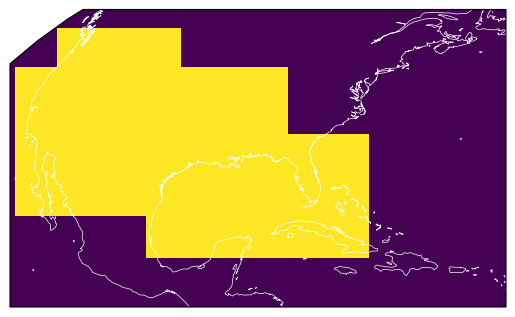

In [26]:
mask1 = (ds.x > -0.088) & (ds.x < -0.053) & (ds.y >= 0.112) & (ds.y < 0.123)
mask2 = (ds.x > -0.1) & (ds.x < -0.023) & (ds.y >= 0.093) & (ds.y < 0.112)
mask3 = (ds.x > -0.1) & (ds.x < 0) & (ds.y >= 0.07) & (ds.y < 0.093)
mask4 = (ds.x > -0.063) & (ds.x < 0) & (ds.y > 0.058) & (ds.y < 0.07)

mastermask = mask1 | mask2 | mask3 | mask4

ax=plt.subplot(projection=ds.rgb.crs)
ax.imshow(mastermask.T, **ds.rgb.imshow_kwargs)
ax.coastlines(color='white', linewidth=0.5)

In [28]:
mastermask.to_netcdf('GOES_Harris_mask.nc')

/glade/derecho/scratch/jpan/tmp/ipykernel_10801/4114411052.py:1: SerializationWarning: saving variable x with floating point data as an integer dtype without any _FillValue to use for NaNs
  mastermask.to_netcdf('GOES_Harris_mask.nc')
/glade/derecho/scratch/jpan/tmp/ipykernel_10801/4114411052.py:1: SerializationWarning: saving variable y with floating point data as an integer dtype without any _FillValue to use for NaNs
  mastermask.to_netcdf('GOES_Harris_mask.nc')


In [29]:
loadmask = xr.open_dataset('GOES_Harris_mask.nc')

In [33]:
loadmask.__xarray_dataarray_variable__.sum()

<xarray.DataArray '__xarray_dataarray_variable__' ()>
array(1563421)
Coordinates:
    t                    datetime64[ns] ...
    y_image              float32 ...
    x_image              float32 ...
    dataset_name         object ...
    date_created         object ...
    time_coverage_start  object ...
    time_coverage_end    object ...